In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# if a number is max in a list thenthe percentile of that number is 100 as no other number is greater than that 
# 50 percentile is median

In [3]:
# we can cap or remove them 
# when we perform capping in percenetile method we call it Winsorisation
#capping me second last element se vo percentile ke uppar wala value ko replace kardiya jata hvice versa for last 

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day44-outlier-detection-using-percentiles/weight-height.csv")

In [5]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [20]:
df.shape

(10000, 3)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [19]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

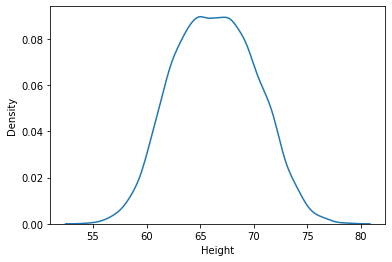

In [9]:
sns.distplot(df.Height,hist=False)

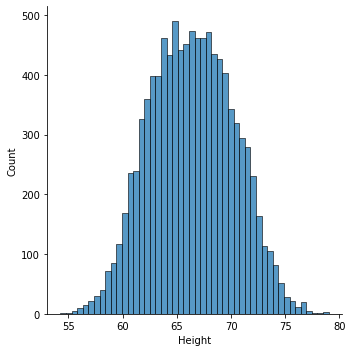

In [14]:
sns.displot(df.Height)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

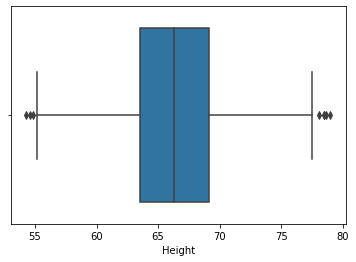

In [16]:
sns.boxplot(df.Height)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

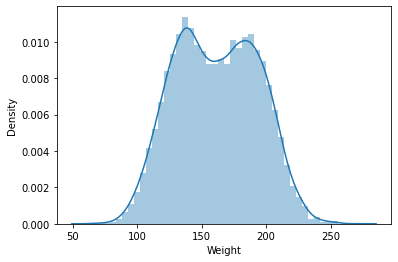

In [15]:
sns.distplot(df.Weight)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

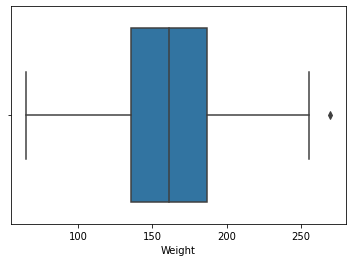

In [17]:
sns.boxplot(df.Weight)

In [ ]:
# You have to remove same amount of percentile from both the ends 

In [21]:
upper_limit = df["Height"].quantile(0.99) # mens that anything above 99 percentile is an outlier
upper_limit

74.7857900583366

In [22]:
lower_limit = df["Height"].quantile(0.01)
lower_limit

58.13441158671655

In [24]:
df[(df["Height"]>upper_limit) | (df["Height"]<lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [26]:
ndf = df[(df["Height"]<upper_limit) & (df["Height"]>lower_limit)]

In [27]:
ndf.Height.describe()

count    9800.000000
mean       66.364366
std         3.645075
min        58.134496
25%        63.577162
50%        66.318070
75%        69.119896
max        74.785714
Name: Height, dtype: float64

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

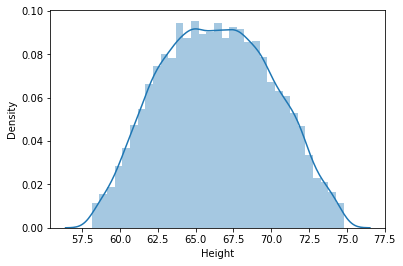

In [28]:
sns.distplot(ndf.Height)

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

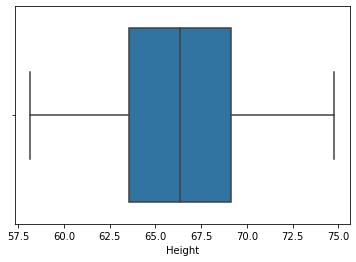

In [29]:
sns.boxplot(ndf["Height"])

# Capping --> Winsorisation

In [30]:
np.where(df["Height"]>upper_limit,
         upper_limit,
        np.where(df["Height"]<lower_limit,
                 lower_limit,
                df["Height"]))

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [31]:
df['Height'] = np.where(df["Height"]>upper_limit,
         upper_limit,
        np.where(df["Height"]<lower_limit,
                 lower_limit,
                df["Height"]))

In [32]:
df.shape

(10000, 3)

In [33]:
df.Height.describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

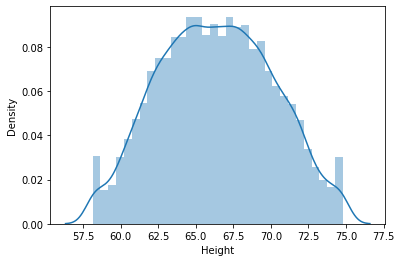

In [34]:
sns.distplot(df.Height)
# it is raised from the end as we performed capping

C:\Users\mynam\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

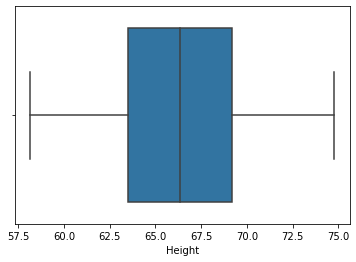

In [35]:
sns.boxplot(df.Height)

In [36]:
# doo experiment it mayy differ for the data